A tener en cuenta:
Correlación variables independientes (X) con la variable objetivo, 
se podrían hacer algunas transformaciones?, 
qué métrica de performance usarías para este problema? 
hay que hacer alguna limpieza a los datos? 

hay cantidad muchos de featues con valores nulos? 
cómo los vas a imputar? los vas a eliminar? por qué?

In [146]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from IPython.display import display
from sklearn.model_selection import train_test_split


In [105]:
# Cargar los datos de entrenamiento y pruebas
data_train = pd.read_csv("dataset/housing_train.csv")
data_test = pd.read_csv("dataset/housing_test.csv")

In [77]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [78]:
# Información de los datos de pruebas
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

CORRECCION DE LOS TIPOS DE DATOS

In [138]:
# Corregir el tipo de los datos
num_cols = [
    'Id','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2',
    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
    'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
    'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
    'ScreenPorch','PoolArea','MiscVal','MoSold',
    'LotFrontage','MasVnrArea','MasVnrType','BsmtQual',
    'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'Electrical','GarageType','GarageFinish','GarageQual', 
    'GarageCond','GarageYrBlt','MSZoning','Utilities',
    'Exterior1st','Exterior2nd','KitchenQual','Functional',
    'SaleType','SalePrice',
]

# Columnas catagoricas de train
cat_cols_train = []

for col in data_train.columns:
    if col not in num_cols:
        data_train[col] = data_train[col].astype('category')
        cat_cols_train.append(col)

# Columnas catagoricas de test
cat_cols_test = []

for col in data_test.columns:
    if col not in num_cols:
        data_test[col] = data_test[col].astype('category')
        cat_cols_test.append(col)

TRATAMIENTO DE DATOS NULOS

TRATAMIENTO DE DATOS DEL DATA SET DE TRAIN

In [107]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 19


In [108]:
# Filtrar datos nulos en train que se encuentren en cualquier columna de cualquier fila
data_train[data_train.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [109]:
# Se revisa que datos están nulos (NaN) por cada variable de train

# Filtrar las columnas con valores nulos mayores a 0
missing_values_train = missing_values_train[missing_values_train > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_train.index, 'Cantidad de Valores Nulos': missing_values_train.values})

,Variable,Cantidad de Valores Nulos
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


In [110]:
#Se eliminan las variables del data set porque son demasiados datos perdidos
data_train= data_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [111]:
# Se vuelven a calcular los valores nulos por columna
missing_values_train = data_train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_train.index, 'Cantidad de Valores Nulos': missing_values_train.values})


,Variable,Cantidad de Valores Nulos
0,LotFrontage,259
1,MasVnrType,872
2,MasVnrArea,8
3,BsmtQual,37
4,BsmtCond,37
5,BsmtExposure,38
6,BsmtFinType1,37
7,BsmtFinType2,38
8,Electrical,1
9,GarageType,81


Se puede visualizar que ya sólo aparecen 13 variables con valores perdidos

In [ ]:
# Reemplazo de NA por el valor None
cols_NA_caracteristicasTexto= ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Se adicona a las variables categoricas la categoría 'None'
for col in cols_NA_caracteristicasTexto:
    if data_train[col].dtype.name == 'category':
        # Agregar 'None' como categoría
        data_train[col] = data_train[col].cat.add_categories(['None'])

data_train[cols_NA_caracteristicasTexto] = data_train[cols_NA_caracteristicasTexto].fillna('None')

# Reemplazo de NA por el valor 0 en columnas numericas
cols_NA_caracteristicasNumericas= ['LotFrontage','MasVnrArea','GarageYrBlt']
data_train[cols_NA_caracteristicasNumericas] = data_train[cols_NA_caracteristicasNumericas].fillna(0)

In [113]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


Se puede observar que ya no hay datos nulos en el data set de train

TRATAMIENTO DE DATOS DEL DATA SET DE TEST

In [116]:
# Analisis de datos faltantes en test
missing_values_test = data_test.isnull().sum()
print("Porcentaje de datos nulos en test:", len(missing_values_test[missing_values_test>0]*100/len(data_test)))

Porcentaje de datos nulos en test: 33


In [117]:
# Filtrar datos nulos en train que se encuentren en cualquier columna de cualquier fila
data_test[data_test.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [118]:
# Se revisa que datos están nulos (NaN) por cada variable de test

# Filtrar las columnas con valores nulos mayores a 0
missing_values_test = missing_values_test[missing_values_test > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_test.index, 'Cantidad de Valores Nulos': missing_values_test.values})


,Variable,Cantidad de Valores Nulos
0,MSZoning,4
1,LotFrontage,227
2,Alley,1352
3,Utilities,2
4,Exterior1st,1
5,Exterior2nd,1
6,MasVnrType,894
7,MasVnrArea,15
8,BsmtQual,44
9,BsmtCond,45


In [119]:
#Se eliminan las variables del data set porque son demasiados datos perdidos
data_test= data_test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [134]:
# Analisis de datos faltantes en test
missing_values_test = data_test.isnull().sum()
print("Porcentaje de datos nulos en test:", len(missing_values_test[missing_values_test>0]*100/len(data_test)))

Porcentaje de datos nulos en test: 28


In [135]:
# Filtrar datos nulos en train que se encuentren en cualquier columna de cualquier fila
data_test[data_test.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,...,21,0,0,0,0,500,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [136]:
# Se vuelven a calcular los valores nulos por columna
missing_values_test = missing_values_test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]

# Crear un DataFrame
#pd.DataFrame({'Variable': missing_values_test.index, 'Cantidad de Valores Nulos': missing_values_test.values})
#print(missing_values_test)

In [139]:
# Reemplazo de NA por el valor None
cols_NA_caracteristicasTextoTrain= ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MSZoning',
'Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',]

# Se adiciona a las variables categoricas la categoría 'None'
for col in cols_NA_caracteristicasTextoTrain:
    if data_train[col].dtype.name == 'category':
        # Agregar 'None' como categoría
        data_train[col] = data_train[col].cat.add_categories(['None'])

data_train[cols_NA_caracteristicasTextoTrain] = data_train[cols_NA_caracteristicasTextoTrain].fillna('None')

# Reemplazo de NA por el valor 0 en columnas numericas
cols_NA_caracteristicasNumericasTrain= ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
data_train[cols_NA_caracteristicasNumericasTrain] = data_train[cols_NA_caracteristicasNumericasTrain].fillna(0)

In [140]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


ANALISIS DE REGISTROS DUPLICADOS

In [141]:
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())
print("Número de duplicados en test:", data_test.duplicated().sum())

Número de duplicados en train: 0
Número de duplicados en test: 0


In [142]:
#Se elimina el id
data_test= data_test.drop(['Id'], axis=1)
data_train= data_train.drop(['Id'], axis=1)

In [143]:
# Analisis de registros duplicados exactos despues de eliminar el id
print("Número de duplicados en train:", data_train.duplicated().sum())
print("Número de duplicados en test:", data_test.duplicated().sum())

Número de duplicados en train: 0
Número de duplicados en test: 0


CORREGIR EL TIPO DE LOS DATOS

In [144]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   ca

In [13]:
# Información de los datos de pruebas
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

ANALISIS EXPLORATORIO

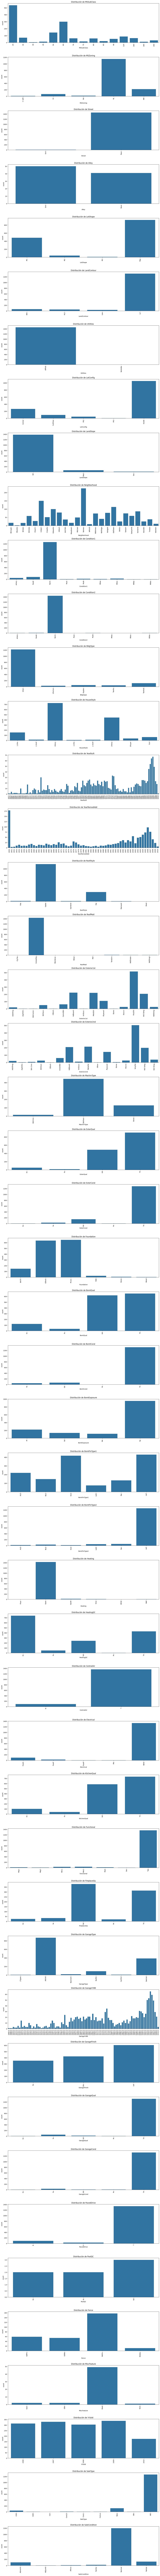

In [14]:
# Variables categóricas
# Seleccionar las columnas categóricas
categorical_columns = data_train.select_dtypes(include='category').columns

# Configurar el tamaño de la cuadrícula
n_cols = 1  # Número de gráficos por fila
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Ajustar el tamaño total del canvas
axes = axes.flatten()  # Asegurar que los ejes están en un arreglo plano

# Crear un gráfico para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X

# Si hay más ejes que gráficos, ocultarlos
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar el espacio entre filas
plt.subplots_adjust(hspace=60)  # Cambiar a un valor mayor para aumentar el espacio entre filas

plt.tight_layout()  # Ajustar los espacios entre gráficos (opcional)
plt.show()

In [145]:
# Resumen estadístico para train
data_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


Se revisa la correlación de las variables numericas contra SalePrice

In [15]:
# Calcular la correlación entre variables numericas
data_train[num_cols].corr()['SalePrice']

Id              -0.021917
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [16]:
#Matriz de correlación
# Seleccionar solo las columnas numéricas del DataFrame
numeric_data = data_train[num_cols]  # num_cols contiene las columnas numéricas

# Calcular la matriz de correlación
numeric_data.corr()


,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.028365,0.012609,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.351799
LotArea,-0.033226,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
OverallQual,-0.028365,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982
OverallCond,0.012609,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856
MasVnrArea,-0.050298,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581


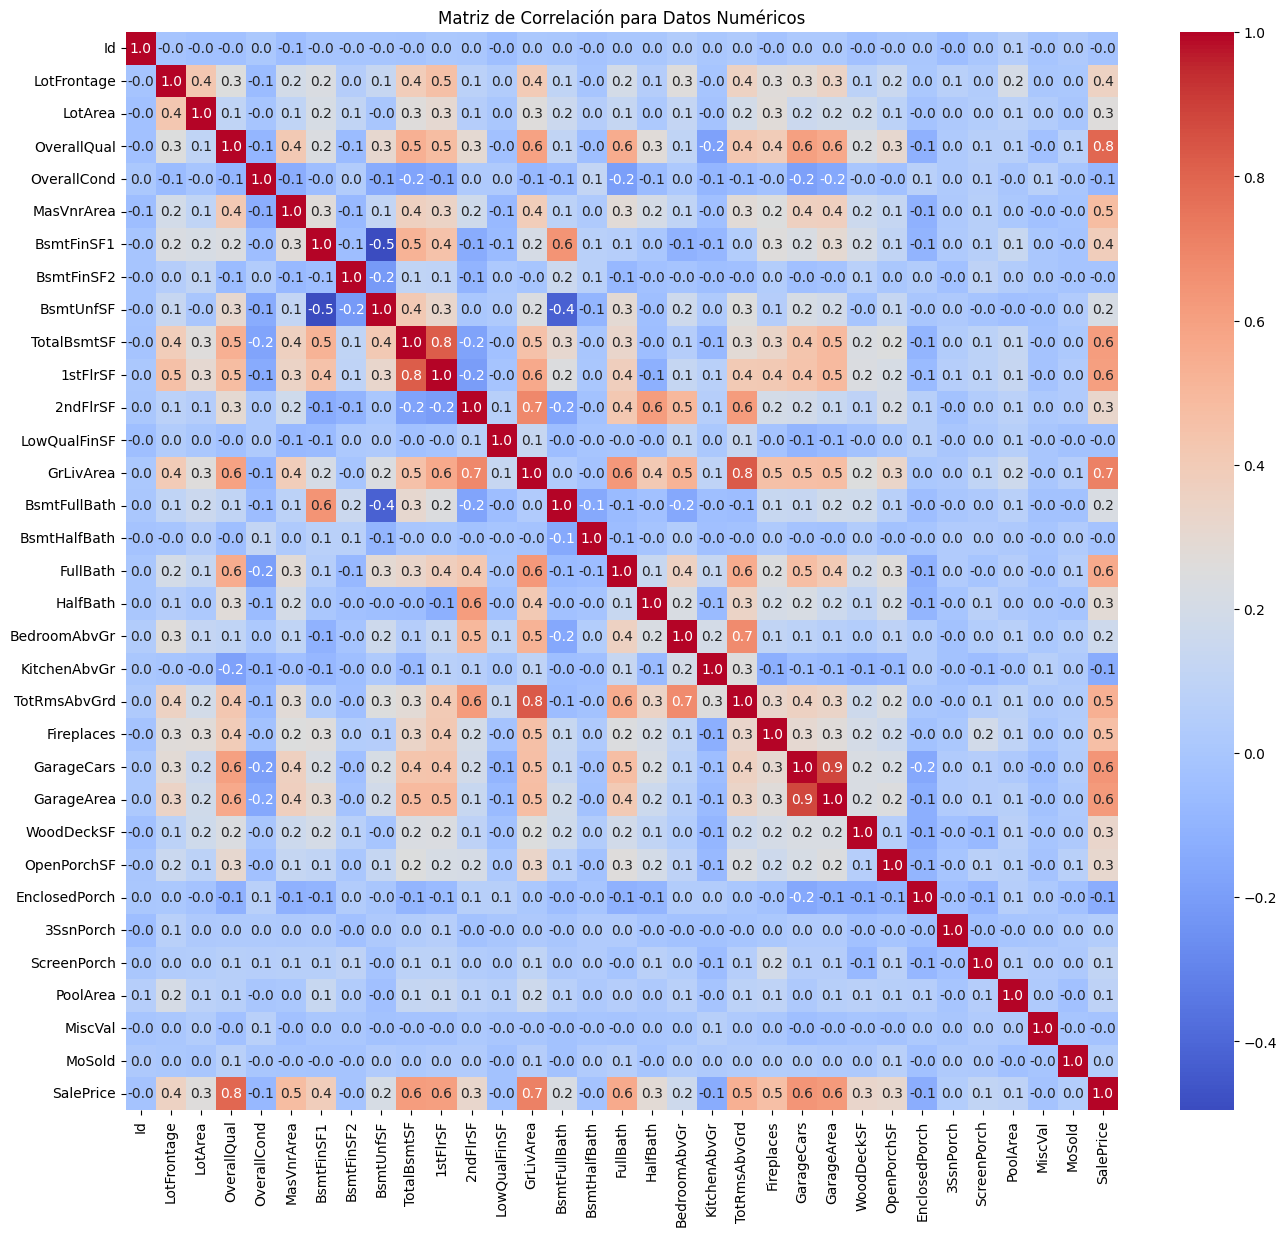

In [17]:
#Graficas de correlación
numeric_data = data_train[num_cols]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación para Datos Numéricos")
plt.show()

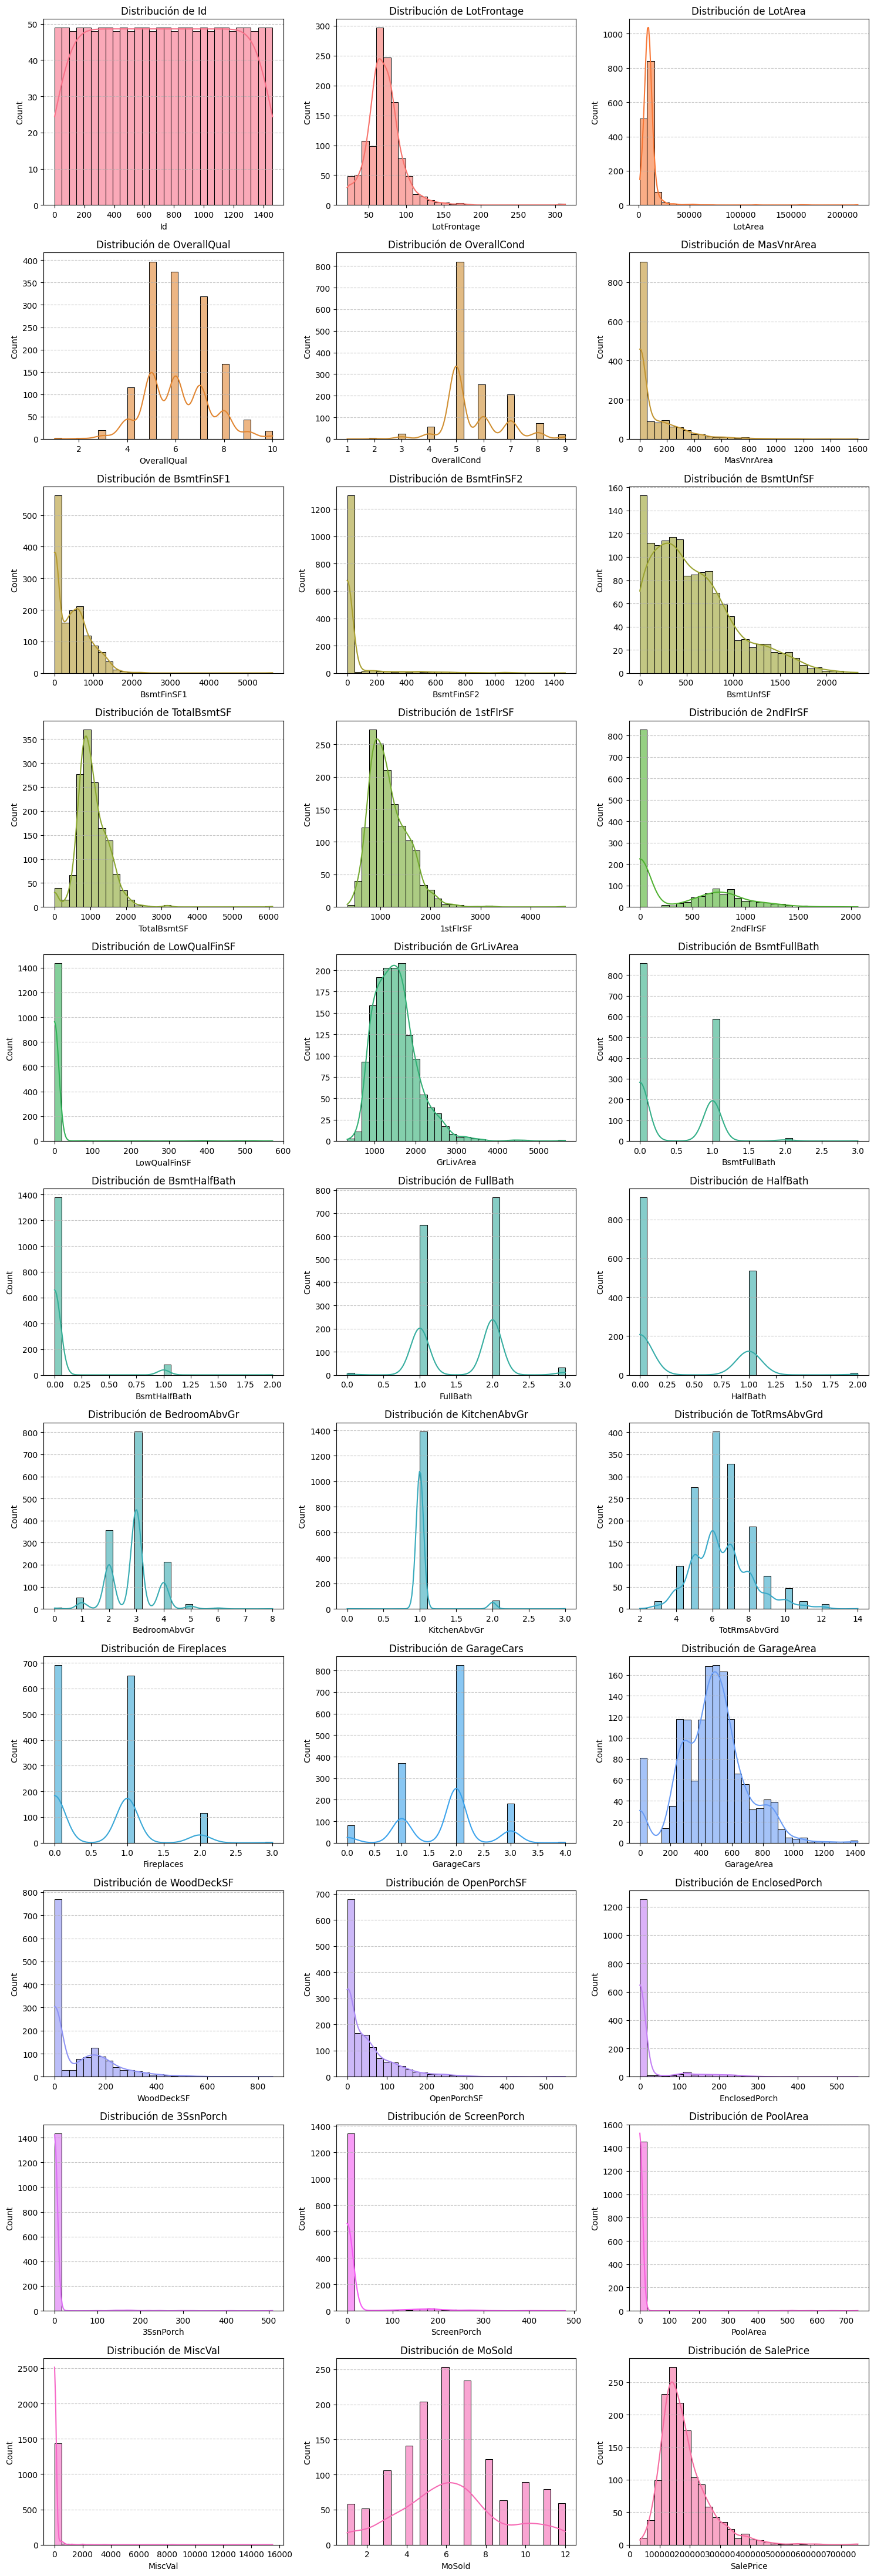

In [18]:
# Lista de colores para las gráficas
colors = sns.color_palette("husl", len(num_cols))  # Paleta de colores basada en la cantidad de variables

# Número de filas y columnas en el grid
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for i, col in enumerate(num_cols):
    sns.histplot(data=data_train, x=col, kde=True, bins=30, ax=axes[i], color=colors[i], alpha=0.6)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar los ejes vacíos si hay menos variables que espacios en el grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# División de los datos en train y test

X = data_train.drop(columns='SalePrice')
y = data_test['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )